In [1]:
#predict hot comment
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
df=pd.read_csv("train.csv",encoding="utf-8")
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df.head()#查看信息

,time,count_head,count_content,r_unique,r_non_stop,r_non_stop_unique,count_link,count_inter_link,count_images,count_videos,...,sent_pos_min,sent_pos_max,sent_neg_avg,sent_neg_min,sent_neg_max,head_neutral,sent_head,head_neutral_scaled,sent_head_abs,hot
0,576,7,636,0.522581,1.0,0.666667,7,3,1,0,...,0.033333,0.75,-0.196759,-0.3000,-0.050000,0.000000,0.000000,0.500000,0.000000,0
1,568,7,1027,0.407407,1.0,0.612546,12,0,1,0,...,0.050000,1.00,-0.509788,-1.0000,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,252,11,285,0.539007,1.0,0.716867,6,1,1,0,...,0.050000,0.80,-0.116667,-0.2000,-0.066667,0.833333,0.166667,0.333333,0.166667,1
3,210,13,1000,0.396189,1.0,0.558376,7,4,1,0,...,0.050000,1.00,-0.275463,-0.7000,-0.100000,0.125000,-0.125000,0.375000,0.125000,0
4,707,10,249,0.621399,1.0,0.761589,5,3,1,0,...,0.100000,0.50,-0.177083,-0.1875,-0.166667,0.500000,0.500000,0.000000,0.500000,1


In [3]:
df.iloc[0]#查看数据类型

time                      576.000000
count_head                  7.000000
count_content             636.000000
r_unique                    0.522581
r_non_stop                  1.000000
r_non_stop_unique           0.666667
count_link                  7.000000
count_inter_link            3.000000
count_images                1.000000
count_videos                0.000000
avg_word_len                4.880503
count_labels                8.000000
forum_life                  0.000000
forum_entertainment         0.000000
forum_business              0.000000
forum_stock                 0.000000
forum_tech                  0.000000
forum_international         1.000000
worst_label_min             4.000000
worst_label_max          1600.000000
worst_label_avg           299.000000
best_label_min              0.000000
best_label_max         690400.000000
best_label_avg         192350.000000
avg_label_min               0.000000
avg_label_max            3809.832454
avg_label_avg            2750.526243
r

In [4]:
#df.iloc[0]

In [5]:
df.info#查看数据基本信息

<bound method DataFrame.info of        time  count_head  count_content  r_unique  r_non_stop  \
0       576           7            636  0.522581         1.0   
1       568           7           1027  0.407407         1.0   
2       252          11            285  0.539007         1.0   
3       210          13           1000  0.396189         1.0   
4       707          10            249  0.621399         1.0   
...     ...         ...            ...       ...         ...   
23995   238          10            252  0.665217         1.0   
23996    51          12            416  0.569682         1.0   
23997   284          11            283  0.562724         1.0   
23998   426          13           2272  0.366758         1.0   
23999   219          11            211  0.604762         1.0   

       r_non_stop_unique  count_link  count_inter_link  count_images  \
0               0.666667           7                 3             1   
1               0.612546          12                 0 

In [6]:
df["hot"].value_counts()#查看目标变量分布

0    16000
1     8000
Name: hot, dtype: int64

In [7]:
df["missing_var"] =df.isnull().sum(axis=1)

In [8]:
df["missing_var"].value_counts()#无缺失样本

0    24000
Name: missing_var, dtype: int64

In [9]:
def find_day(df):#找到评论创建日期
    find_create_day=[]
    for i,row in df.iterrows():
        if row["w1"]==1:
            find_create_day.append(1)
        elif row["w2"]==1:
            find_create_day.append(2)
        elif row["w3"]==1:
            find_create_day.append(3)
        elif row["w4"]==1:
            find_create_day.append(4)
        elif row["w5"]==1:
            find_create_day.append(5)
        elif row["w6"]==1:
            find_create_day.append(6)
        else:
            find_create_day.append(7)
    return find_create_day
find_create_day=find_day(df)
df["create_day"]=find_create_day

In [10]:
df=df.drop(columns=["missing_var"])
df=df.drop(columns=["r_reg"])#与r_pos提供相同信息，属于多余列 删除
df=df.drop(columns=["w1","w2","w3","w4","w5","w6","w7"])#用create_day 的信息来代替7列

In [11]:
df[df["r_non_stop"]==0]#只含有图片或者视频的评论 无文字的评论！

,time,count_head,count_content,r_unique,r_non_stop,r_non_stop_unique,count_link,count_inter_link,count_images,count_videos,...,sent_pos_max,sent_neg_avg,sent_neg_min,sent_neg_max,head_neutral,sent_head,head_neutral_scaled,sent_head_abs,hot,create_day
22,293,11,0,0.0,0.0,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.233333,-0.025000,0.266667,0.025000,1,5
49,695,12,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.355556,0.344444,0.144444,0.344444,0,2
108,55,11,0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.277273,0.043182,0.222727,0.043182,1,5
123,224,12,0,0.0,0.0,0.0,0,0,9,0,...,0.0,0.0,0.0,0.0,0.375000,-0.125000,0.125000,0.125000,0,4
161,37,13,0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.750000,-0.050000,0.250000,0.050000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23887,9,15,0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,1,2
23901,171,13,0,0.0,0.0,0.0,0,0,17,0,...,0.0,0.0,0.0,0.0,0.250000,-0.125000,0.250000,0.125000,0,1
23918,90,10,0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0,5
23949,296,13,0,0.0,0.0,0.0,0,0,8,0,...,0.0,0.0,0.0,0.0,0.225000,-0.200000,0.275000,0.200000,1,2


In [12]:
df.describe()#查看数据统计性描述

,time,count_head,count_content,r_unique,r_non_stop,r_non_stop_unique,count_link,count_inter_link,count_images,count_videos,...,sent_pos_max,sent_neg_avg,sent_neg_min,sent_neg_max,head_neutral,sent_head,head_neutral_scaled,sent_head_abs,hot,create_day
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,351.366333,10.444792,539.139333,0.532820,0.97025,0.675979,10.462250,3.241833,4.299167,1.250333,...,0.75169,-0.258702,-0.520003,-0.106908,0.277831,0.066467,0.341138,0.152252,0.333333,3.336292
std,214.433379,2.116279,455.876194,0.136609,0.16990,0.153554,10.904427,3.744198,8.145460,4.167780,...,0.24816,0.127582,0.290714,0.094483,0.320701,0.261392,0.189288,0.222626,0.471414,1.725275
min,8.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
25%,159.000000,9.000000,247.000000,0.473743,1.00000,0.629509,4.000000,1.000000,1.000000,0.000000,...,0.60000,-0.327778,-0.700000,-0.125000,0.000000,0.000000,0.163920,0.000000,0.000000,2.000000
50%,337.000000,10.000000,410.000000,0.540881,1.00000,0.693264,7.000000,2.000000,1.000000,0.000000,...,0.80000,-0.252901,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,0.000000,3.000000
75%,539.000000,12.000000,703.000000,0.609756,1.00000,0.756237,13.000000,4.000000,3.000000,1.000000,...,1.00000,-0.185648,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,1.000000,5.000000
max,731.000000,20.000000,7764.000000,1.000000,1.00000,1.000000,304.000000,116.000000,128.000000,91.000000,...,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,1.000000,7.000000


In [13]:
#建模所需的库
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
X=df.drop(columns=["hot"])
y=df["hot"]

In [14]:
#数据去中心化处理
from sklearn import preprocessing
X=preprocessing.scale(X)

In [15]:
#划分训练集和验证集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)#确定初始种子，保证下次随机结果一致
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=3,n_jobs=3)#划分为3个
scores=cross_val_score(knn,X,y,scoring='accuracy',cv=10)#十折交叉验证

print(scores)
print(scores.mean())

[0.64958333 0.67       0.67208333 0.65       0.66       0.67666667
 0.64666667 0.64583333 0.65708333 0.65208333]
0.658


In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=3, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
'''
#Grid Search 找出最佳的k紧邻数目
from sklearn.model_selection import GridSearchCV
k_range=range(1,30)
#k_score=[]
weight_options=["uniform","distance"]
params=dict(n_neighbors=k_range,weights=weight_options)
knn=KNeighborsClassifier(n_jobs=3) 
gridKnn=GridSearchCV(knn,params,cv=10,scoring="accuracy",verbose=1)
gridKnn.fit(X_train,y_train)
print("best score is: %s"%gridKnn.best_score_)
print("best params are: %s"%gridKnn.best_params_)
'''

'\n#Grid Search 找出最佳的k紧邻数目\nfrom sklearn.model_selection import GridSearchCV\nk_range=range(1,30)\n#k_score=[]\nweight_options=["uniform","distance"]\nparams=dict(n_neighbors=k_range,weights=weight_options)\nknn=KNeighborsClassifier(n_jobs=3) \ngridKnn=GridSearchCV(knn,params,cv=10,scoring="accuracy",verbose=1)\ngridKnn.fit(X_train,y_train)\nprint("best score is: %s"%gridKnn.best_score_)\nprint("best params are: %s"%gridKnn.best_params_)\n'

In [29]:
#采用最佳参数构建Knn模型
knn=KNeighborsClassifier(n_neighbors=10,weights="uniform",n_jobs=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=3, n_neighbors=10, p=2,
                     weights='uniform')

In [19]:
#最佳参数模型评估
scores=cross_val_score(knn,X_test,y_test,scoring='accuracy',cv=10)
print(scores)
print(scores.mean())

[0.68654646 0.70319001 0.69902913 0.69486824 0.68888889 0.70972222
 0.69401947 0.7093185  0.70514604 0.71349096]
0.7004219918226865


Text(0.5, 1.0, 'ROC curve')

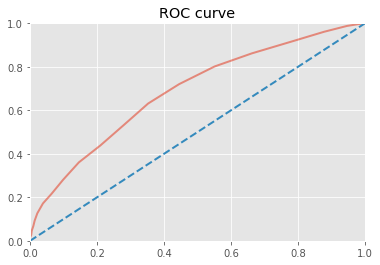

In [20]:
#绘制ROC曲线
from sklearn.metrics import roc_curve,auc
y_predict=knn.predict_proba(X_test)
fpr_lr,tpr_lr,thresholds_lr=roc_curve(y_test,y_predict[:,1])
roc_auc_lr=auc(fpr_lr,tpr_lr)
plt.plot(fpr_lr,tpr_lr,lw=2,alpha=.6)
plt.plot([0,1],[0,1],lw=2,linestyle="--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("ROC curve")

In [21]:
#引入joblib模块
#from sklearn.externals import joblib
#保存model
#joblib.dump(knn,'knn_predict.pkl')

In [22]:
import pandas as pd
df=pd.read_csv("test.csv",encoding="latin1")
find_create_day=find_day(df)
df["create_day"]=find_create_day
df=df.drop(columns=["r_reg"])#与r_pos提供相同信息，属于多余列 删除
df=df.drop(columns=["w1","w2","w3","w4","w5","w6","w7"])#用create_day 的信息来代替7列

In [30]:
#预测评论是否会火，0代表不会，1代表会
y_predict=knn.predict(df)
y_predict=pd.DataFrame(y_predict)

In [24]:
#y_predict.to_csv('Results_1.csv', encoding = 'utf-8', index=False , header=False)

In [31]:
#查看预测结果的二值比例
y_predict[0].value_counts()

0    15005
1      638
Name: 0, dtype: int64

In [27]:
y_predict

,0
0,0
1,0
2,0
3,0
4,0
...,...
15638,0
15639,0
15640,0
15641,0
